# Background

# Problem Statement

# Data Understanding and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = 'Dataset/explore_it/Public Transportation Transaction - Transjakarta/Transjakarta.csv'
df = pd.read_csv(path)
df_raw = df.copy()

In [3]:
pd.set_option('display.max_columns', None)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [5]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [6]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [7]:
pd.set_option('display.max_colwidth', 144)

list_item = []
for col in df.columns :
    list_item.append([col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['columnName', 'numberOfUnique', 'uniqueSample'],
                    data=list_item)
df_unique

,columnName,numberOfUnique,uniqueSample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S7..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 65100..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Ma..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q, 5M, M7B, 9A, 4, JAK.46, S22, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 1C, 3B, M..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - P..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B00127P, B00243P, B03416P, B00795P, B05781P, B05433P, P00254, P00281, P00159, B00608P, B05291P, ..."


In [8]:
null_percentage = (df.isna().sum() / df.shape[0] * 100).round(2)
null_percentage

transID             0.00
payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          3.32
corridorName        5.09
direction           0.00
tapInStops          3.20
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
stopStartSeq        0.00
tapInTime           0.00
tapOutStops         6.04
tapOutStopsName     3.55
tapOutStopsLat      3.55
tapOutStopsLon      3.55
stopEndSeq          3.55
tapOutTime          3.55
payAmount           2.66
dtype: float64

In [9]:
col_missing = null_percentage[null_percentage > 0].index
df_missing = df[col_missing]

<Axes: >

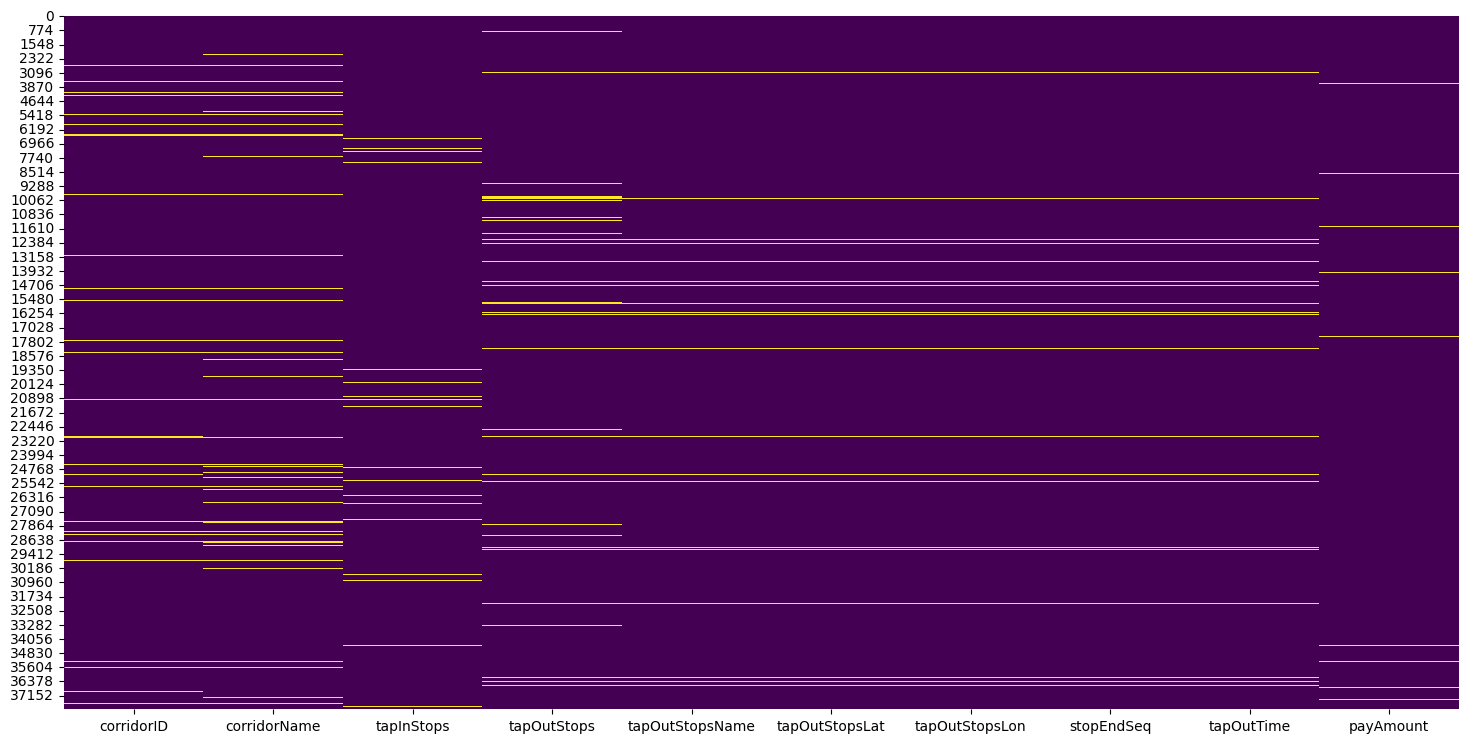

In [10]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_missing.isna(), cbar=False, cmap='viridis')

## corridorID

In [11]:
df.loc[df['corridorID'].isna() == True, ['corridorID', 'corridorName']]

,corridorID,corridorName
7,NaN,NaN
120,NaN,NaN
240,NaN,NaN
250,NaN,NaN
257,NaN,NaN
...,...,...
37689,NaN,NaN
37727,NaN,NaN
37770,NaN,NaN
37797,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang


In [12]:
print('Missing corridorID: ', df['corridorID'].isna().sum())

df_missing_corridorID = df.loc[(df['corridorID'].isna() == True) & (df['corridorName'].isna() == False), ['corridorID', 'corridorName']]
print('Missing corridorID but have corridorName: ', df_missing_corridorID['corridorName'].count())
df_missing_corridorID.head()

Missing corridorID:  1257
Missing corridorID but have corridorName:  132


,corridorID,corridorName
438,NaN,Rusun Waduk Pluit - Penjaringan
895,NaN,Tanah Abang - Kebayoran Lama
1410,NaN,Sunter Boulevard Barat - Penjaringan
1723,NaN,Pulo Gebang - Pulo Gadung 2 via PIK
2423,NaN,Kampung Melayu - Pulo Gebang via BKT


In [13]:
df_corridor = df.loc[:, ['corridorID', 'corridorName']].dropna().groupby(['corridorID', 'corridorName']).value_counts().reset_index().drop('count', axis=1).drop_duplicates()
df_corridor

,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


In [14]:
corridor_unique = [] 

for corridorID_name in df_corridor['corridorName']:
    if len(df_corridor[df_corridor['corridorName'] == corridorID_name]) > 1:
        if corridorID_name not in corridor_unique:
            corridor_unique.append(corridorID_name) 
            cor_id = df_corridor[df_corridor['corridorName'] == corridorID_name]
            print(cor_id)

    corridorID   corridorName
0            1  Blok M - Kota
198         M1  Blok M - Kota
    corridorID         corridorName
41           2  Pulo Gadung - Monas
204         M2  Pulo Gadung - Monas
    corridorID                         corridorName
49           3  Kalideres - Bundaran HI via Veteran
205         M3  Kalideres - Bundaran HI via Veteran
    corridorID           corridorName
62           5  Matraman Baru - Ancol
207         M5  Matraman Baru - Ancol
    corridorID          corridorName
98           9  Pinang Ranti - Pluit
212         M9  Pinang Ranti - Pluit


In [15]:
def cor_rename(cor_id):
    match cor_id:
        case 'M1':
            return '1'
        case 'M2':
            return '2'
        case 'M3':
            return '3'
        case 'M5':
            return '5'
        case 'M9':
            return '9'
        case _:
            return cor_id

df.loc[:, 'corridorID'] = df.loc[:, 'corridorID'].apply(cor_rename)

In [16]:
df_corridor = df_corridor.drop(df_corridor[df_corridor['corridorID'].isin(['M1','M2','M3','M5','M9'])].index)

In [17]:
for index in range(len(df)):
    if type(df.loc[index,'corridorID']) != type(np.NAN):
        continue
    if type(df.loc[index,'corridorName']) == type(np.NAN):
        continue
    df.loc[index,'corridorID'] = df_corridor.loc[df_corridor['corridorName'] == df.loc[index, 'corridorName'], 'corridorID'].reset_index(drop=True)[0]

In [18]:
print('corridorID before: ', df_raw['corridorID'].isna().sum())
print('corridorID after: ', df['corridorID'].isna().sum())

df_missing_corridorID = df.loc[(df['corridorID'].isna() == True) & (df['corridorName'].isna() == False), ['corridorID', 'corridorName']]
print('Missing corridorID but have corridorName: ',df_missing_corridorID['corridorName'].count())

corridorID before:  1257
corridorID after:  1125
Missing corridorID but have corridorName:  0


## corridorName

In [19]:
print('Missing corridorName: ', df['corridorName'].isna().sum())

df_missing_corridorName = df.loc[(df['corridorName'].isna() == True) & (df['corridorID'].isna() == False), ['corridorName', 'corridorID']]
print('Missing corridorName but have corridorID: ', df_missing_corridorName['corridorID'].count())
df_missing_corridorName.head()

Missing corridorName:  1930
Missing corridorName but have corridorID:  805


,corridorName,corridorID
38,NaN,5M
39,NaN,2
60,NaN,T21
61,NaN,12A
73,NaN,3


In [20]:
for index in range(len(df)):
    if type(df.loc[index, 'corridorName']) != type(np.NAN):
        continue
    if type(df.loc[index, 'corridorID']) == type(np.NAN):
        continue
    df.loc[index, 'corridorName'] = df_corridor.loc[df_corridor['corridorID'] == df.loc[index, 'corridorID'], 'corridorName'].reset_index(drop=True)[0]

In [21]:
print('corridorName before: ', df_raw['corridorName'].isna().sum())
print('corridorName after: ', df['corridorName'].isna().sum())

df_missing_corridorName = df.loc[(df['corridorName'].isna() == True) & (df['corridorID'].isna() == False), ['corridorID', 'corridorName']]
print('Missing corridorID but have corridorID: ',df_missing_corridorName['corridorID'].count())

corridorName before:  1930
corridorName after:  1125
Missing corridorID but have corridorID:  0


## tapInStops

In [22]:
df.loc[(df['tapInStops'].isna() == True), ['tapInStops', 'tapInStopsName']]

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi
...,...,...
37775,NaN,Sbr. Gg. Langgar Kelapa Dua
37816,NaN,Cipinang Lontar Rusun Polri
37822,NaN,Menara Cardig
37855,NaN,Kel. Balekambang


In [23]:
print('Missing tapInStops: ', df['tapInStops'].isna().sum())

df_missing_tapInStops = df.loc[(df['tapInStops'].isna() == True) & (df['tapInStopsName'].isna() == False), ['tapInStops', 'tapInStopsName']]
print('Missing tapInStops but have tapInStopsName: ', df_missing_tapInStops['tapInStopsName'].count())
df_missing_tapInStops.head()

Missing tapInStops:  1213
Missing tapInStops but have tapInStopsName:  1213


,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi


In [24]:
df_tapIn = df.loc[:, ['tapInStops', 'tapInStopsName']].dropna().groupby(['tapInStops', 'tapInStopsName']).value_counts().reset_index().drop('count', axis=1).drop_duplicates()
df_tapIn

,tapInStops,tapInStopsName
0,B00001P,18 Office Park
1,B00004P,ACC Simatupang
2,B00005P,ACE Hardware
3,B00008P,Adam Malik 1
4,B00017P,Akper Fatmawati Pondok Labu
...,...,...
2565,P00294,Sawah Besar Arah Selatan
2566,P00295,Mangga Besar Arah Utara
2567,P00296,Mangga Besar Arah Selatan
2568,P00297,BNN LRT


In [25]:
stops_unique = [] 
for stops_name in df_tapIn['tapInStopsName']:
    if len(df_tapIn[df_tapIn['tapInStopsName'] == stops_name]) > 1:
        if stops_name not in stops_unique:
            stops_unique.append(stops_name) 
            cor_id = df_tapIn[df_tapIn['tapInStopsName'] == stops_name]
            print(cor_id)

     tapInStops tapInStopsName
2359     P00052   Dukuh Atas 2
2569     P00298   Dukuh Atas 2


In [26]:
df_tapIn.drop(df_tapIn.loc[df_tapIn['tapInStopsName'] == 'Dukuh Atas 2'].index, inplace=True)
df_tapIn.reset_index(drop=True)

,tapInStops,tapInStopsName
0,B00001P,18 Office Park
1,B00004P,ACC Simatupang
2,B00005P,ACE Hardware
3,B00008P,Adam Malik 1
4,B00017P,Akper Fatmawati Pondok Labu
...,...,...
2563,P00293,Sawah Besar Arah Utara
2564,P00294,Sawah Besar Arah Selatan
2565,P00295,Mangga Besar Arah Utara
2566,P00296,Mangga Besar Arah Selatan


In [27]:
print('tapInStopsName in df: ', df['tapInStopsName'].nunique())
print('tapInStopsName in df_stops: ', df_tapIn['tapInStopsName'].nunique())

tapInStopsName in df:  2602
tapInStopsName in df_stops:  2568


In [28]:
set_df_tapIn = set(df_tapIn['tapInStopsName'].unique())
set_df = set(df['tapInStopsName'].unique())
if set_df_tapIn.issubset(set_df):
    print('All unique values of tapInStopsName in df_tapIn is in df')
else:
    print('Not all unique values of tapInStopsName in df_tapIn is in df')


list_tapIn = df['tapInStopsName'].unique().tolist()
notIn_tapIn = []
for stops in list_tapIn:
    if stops not in df_tapIn['tapInStopsName'].unique():
        if stops == 'Dukuh Atas 2':
            continue
        notIn_tapIn.append(stops)
notIn_tapIn = pd.DataFrame(notIn_tapIn, columns=['tapInStopsName'])

All unique values of tapInStopsName in df_tapIn is in df


In [29]:
for index in range(len(df)):
    if type(df.loc[index, 'tapInStops']) != type(np.NAN):
        continue
    if df.loc[index, 'tapInStopsName'] in notIn_tapIn.iloc[:, 0].unique():
        continue
    df.loc[index, 'tapInStops'] = df_tapIn.loc[df_tapIn['tapInStopsName'] == df.loc[index, 'tapInStopsName'], 'tapInStops'].reset_index(drop=True)[0]

In [30]:
print('tapInStops before: ', df_raw['tapInStops'].isna().sum())
print('tapInStops after: ', df['tapInStops'].isna().sum())

df_missing_tapInStops = df.loc[(df['tapInStops'].isna() == True) & (df['tapInStopsName'].isna() == False), ['tapInStops', 'tapInStopsName']]
print('Missing tapInStops but have tapInStopsName: ', df_missing_tapInStops['tapInStopsName'].count())

tapInStops before:  1213
tapInStops after:  34
Missing tapInStops but have tapInStopsName:  34


## tapOutStops

In [31]:
df.loc[(df['tapOutStops'].isna() == True), ['tapOutStops', 'tapOutStopsName']]

,tapOutStops,tapOutStopsName
6,NaN,NaN
30,NaN,NaN
70,NaN,NaN
89,NaN,Walikota Jakarta Timur
130,NaN,NaN
...,...,...
37796,NaN,NaN
37799,NaN,NaN
37878,NaN,FX Sudirman
37887,NaN,Pramuka LIA


In [32]:
print('Missing tapOutStops: ', df['tapOutStops'].isna().sum())

df_missing_tapOutStops = df.loc[(df['tapOutStops'].isna() == True) & (df['tapOutStopsName'].isna() == False), ['tapOutStops', 'tapOutStopsName']]
print('Missing tapOutStops but have tapInStopsName: ', df_missing_tapOutStops['tapOutStopsName'].count())
df_missing_tapOutStops.head()

Missing tapOutStops:  2289
Missing tapOutStops but have tapInStopsName:  945


,tapOutStops,tapOutStopsName
89,NaN,Walikota Jakarta Timur
149,NaN,Budi Utomo
168,NaN,Pertamina Kalideres Daan Mogot
359,NaN,Sbr. Kebantenan IX
428,NaN,HKBP Rawamangun


In [33]:
df_tapOut = df.loc[:, ['tapOutStops', 'tapOutStopsName']].dropna().groupby(['tapOutStops', 'tapOutStopsName']).value_counts().reset_index().drop('count', axis=1).drop_duplicates()
df_tapOut 

,tapOutStops,tapOutStopsName
0,B00002P,ABA
1,B00003P,Acacia Residence
2,B00004P,ACC Simatupang
3,B00005P,ACE Hardware
4,B00013P,Ahmad Yani Pisangan Baru
...,...,...
2225,P00293,Sawah Besar Arah Utara
2226,P00294,Sawah Besar Arah Selatan
2227,P00295,Mangga Besar Arah Utara
2228,P00297,BNN LRT


In [34]:
stops_unique = [] 
for stops_name in df_tapOut['tapOutStopsName']:
    if len(df_tapOut[df_tapOut['tapOutStopsName'] == stops_name]) > 1:
        if stops_name not in stops_unique:
            stops_unique.append(stops_name) 
            cor_id = df_tapOut[df_tapOut['tapOutStopsName'] == stops_name]
            print(cor_id)

     tapOutStops tapOutStopsName
2033      P00052    Dukuh Atas 2
2229      P00298    Dukuh Atas 2


In [35]:
df_tapOut.drop(df_tapOut.loc[df_tapOut['tapOutStopsName'] == 'Dukuh Atas 2'].index,inplace=True)
df_tapOut.reset_index(drop=True)

,tapOutStops,tapOutStopsName
0,B00002P,ABA
1,B00003P,Acacia Residence
2,B00004P,ACC Simatupang
3,B00005P,ACE Hardware
4,B00013P,Ahmad Yani Pisangan Baru
...,...,...
2223,P00292,Harmoni Arah Selatan
2224,P00293,Sawah Besar Arah Utara
2225,P00294,Sawah Besar Arah Selatan
2226,P00295,Mangga Besar Arah Utara


In [36]:
print('tapOutStopsName in df: ' ,df['tapOutStopsName'].nunique())
print('tapOutStopsName in df_tapOut: ', df_tapOut['tapOutStopsName'].nunique())

tapOutStopsName in df:  2248
tapOutStopsName in df_tapOut:  2228


In [37]:
set_tapOut = set(df_tapOut['tapOutStopsName'].unique())
set_df = set(df['tapOutStopsName'].unique())
if set_tapOut.issubset(set_df):
    print('All unique values of tapOutStopsName in df_tapIn is in df')
else:
    print('Not all unique values of tapOutStopsName in df_tapIn is in df')

list_tapOut = df['tapOutStopsName'].unique().tolist()
notIn_tapOut = []
for stops in list_tapOut:
    if stops not in df_tapOut['tapOutStopsName'].unique():
        if stops == 'Dukuh Atas 2' or type(stops) == type(np.NAN):
            continue
        notIn_tapOut.append(stops)
notIn_tapOut = pd.DataFrame(notIn_tapOut,columns=['tapOutStopsName'])

All unique values of tapOutStopsName in df_tapIn is in df


In [38]:
for index in range(len(df)):
    if type(df.loc[index, 'tapOutStops']) != type(np.NAN):
        continue
    if type(df.loc[index, 'tapOutStopsName']) == type(np.NAN) or df.loc[index, 'tapOutStopsName'] == 'Dukuh Atas 2':
        continue
    if df.loc[index, 'tapOutStopsName'] in notIn_tapOut.iloc[:, 0].unique():
        continue
    df.loc[index, 'tapOutStops'] = df_tapOut.loc[df_tapOut['tapOutStopsName'] == df.loc[index, 'tapOutStopsName'], 'tapOutStops'].reset_index(drop=True)[0]

In [39]:
print('tapOutStops before: ', df_raw['tapOutStops'].isna().sum())
print('tapOutStops after: ', df['tapOutStops'].isna().sum())

df_missing_tapOuStops = df.loc[(df['tapOutStops'].isna() == True) & (df['tapOutStopsName'].isna() == False), ['tapOutStops', 'tapOutStopsName']]
print('Missing tapOutStops but have tapOutStops: ', df_missing_tapOuStops['tapOutStopsName'].count())

tapOutStops before:  2289
tapOutStops after:  1366
Missing tapOutStops but have tapOutStops:  22


## payAmount

In [40]:
print('Missing payAmount: ', df['payAmount'].isna().sum())
df_missing_payAmount = df.loc[(df['payAmount'].isna() == True) & (df['corridorID'].isna() == False),['corridorID', 'payAmount']]
print('Missing payAmount but have corridorID: ', df_missing_payAmount['corridorID'].count())
display(df_missing_payAmount.head())

Missing payAmount:  1007
Missing payAmount but have corridorID:  979


,corridorID,payAmount
11,M7B,NaN
76,JAK.48B,NaN
97,3H,NaN
169,M7B,NaN
198,JAK.48A,NaN


In [41]:
arr_missing_payAmount = df.loc[(df['payAmount'].isna() == True), ['corridorID', 'payAmount']].groupby(['corridorID']).count().drop('payAmount', axis=1).reset_index().corridorID.unique()
print('corridorID with missing payAmount: ', arr_missing_payAmount)

corridorID with missing payAmount:  ['3H' 'JAK.48A' 'JAK.48B' 'M1H' 'M7B']


In [42]:
payAmount_mask = df.loc[df['payAmount'].isna() == True].index
for index in range(len(df)):
    if index not in payAmount_mask:
        continue
    if type(df.loc[index, 'corridorID']) == type(np.NAN):
        continue
    if df.loc[index, 'corridorID'] in ['JAK.48A', 'JAK.48B']:
        df.loc[index, 'payAmount'] = 0.0
        continue
    if df.loc[index, 'corridorID'] in ['3H', 'M7B', 'M1H']:
        df.loc[index, 'payAmount'] = 3500.0
        continue

In [43]:
print('payAmount before: ', df_raw['payAmount'].isna().sum())
print('payAmount after: ', df['payAmount'].isna().sum())

df_missing_payAmount = df.loc[(df['payAmount'].isna() == True) & (df['corridorID'].isna() == False), ['payAmount', 'corridorID']]
print('Missing payAmount but have corridorID: ',df_missing_payAmount['corridorID'].count())

payAmount before:  1007
payAmount after:  28
Missing payAmount but have corridorID:  0


In [44]:
print('Missing value before: ', df_raw.isnull().any(axis=1).sum())
print('Missing value after: ', df.isnull().any(axis=1).sum())

Missing value before:  6170
Missing value after:  2475


## tapInTime & tapOutTime

In [45]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [46]:
df[df['corridorName']=='Rusun Flamboyan - Cengkareng']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
27,MSFD430X8W13TO,4384653483539395,dki,"Cut Hana Maulana, S.H.",F,1979,3B,Rusun Flamboyan - Cengkareng,0.0,B06299P,Jln. Kayu Besar Dalam,-6.122739,106.73129,2,2023-04-03 05:49:39,B02195P,Mall Taman Palem 3,-6.140548,106.73011,6.0,2023-04-03 06:42:12,0.0
90,WGRY331M3O87VE,2720484776954605,dki,Bancar Irawan,M,1999,3B,Rusun Flamboyan - Cengkareng,0.0,B03206P,RSUD Boulevard Raya,-6.137810,106.73040,4,2023-04-03 06:50:15,B02195P,Mall Taman Palem 3,-6.140548,106.73011,6.0,2023-04-03 07:46:28,0.0
327,FAHN722E1I44NR,4384653483539395,dki,"Cut Hana Maulana, S.H.",F,1979,3B,Rusun Flamboyan - Cengkareng,1.0,B04136P,Sbr. Ps. Cengkareng,-6.151851,106.72708,1,2023-04-03 17:03:07,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-03 19:00:29,0.0
390,MMLR321A9W59HV,2720484776954605,dki,Bancar Irawan,M,1999,3B,Rusun Flamboyan - Cengkareng,1.0,B03041P,Puskesmas Cengkareng,-6.144546,106.72866,4,2023-04-03 16:34:56,B02808P,Perumahan KFT 1,-6.135093,106.72983,6.0,2023-04-03 18:20:57,0.0
627,YNDZ161G6Q73PK,4384653483539395,dki,"Cut Hana Maulana, S.H.",F,1979,3B,Rusun Flamboyan - Cengkareng,0.0,B06299P,Jln. Kayu Besar Dalam,-6.122739,106.73129,2,2023-04-04 06:20:45,B02195P,Mall Taman Palem 3,-6.140548,106.73011,6.0,2023-04-04 07:01:33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34776,JGEU392A2O67VF,342340103174162,emoney,"Puti Tira Prasetyo, S.IP",F,1967,3B,Rusun Flamboyan - Cengkareng,0.0,B03343P,SDN Cengkareng Timur 05,-6.149212,106.72804,10,2023-04-29 07:29:09,B03009P,Puri Agung,-6.150977,106.72798,11.0,2023-04-29 08:37:28,0.0
37809,ZPKT686W4E52US,213192524816871,emoney,Padmi Damanik,M,1974,3B,Rusun Flamboyan - Cengkareng,0.0,B03272P,Rusun Flamboyan,-6.131366,106.72427,0,2023-04-23 20:04:28,B02194P,Mall Taman Palem 2,-6.139245,106.73032,5.0,2023-04-23 20:52:38,0.0
37853,BZRC917P8W81GP,676100508875,flazz,Cut Salsabila Kurniawan,M,1983,3B,Rusun Flamboyan - Cengkareng,0.0,B02195P,Mall Taman Palem 3,-6.140548,106.73011,6,2023-04-01 14:04:40,B05838P,Univ. Satyagama,-6.143228,106.72950,7.0,2023-04-01 15:47:32,0.0
37858,DVXL591U4P06MT,3512921611736416,dki,drg. Harto Kusmawati,M,2009,3B,Rusun Flamboyan - Cengkareng,0.0,B06299P,Jln. Kayu Besar Dalam,-6.122739,106.73129,2,2023-04-05 16:20:12,B03009P,Puri Agung,-6.150977,106.72798,11.0,2023-04-05 17:05:04,0.0


In [47]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1366
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount             28
dtype: int64

## Drop Columns

In [48]:
df.dropna(inplace=True)

## Create New Columns

### age

In [49]:
df['age'] = 2013 - df['payCardBirthDate']

### hour and day

In [50]:
df['time'] = df['tapInTime'].dt.time
df['hour'] = df['tapInTime'].dt.hour
df['date'] = df['tapInTime'].dt.day
df['day'] = df['tapInTime'].dt.day_name()

### type

In [51]:
df['type'] = df['payAmount'].map({
    20000: "royaltrans",
    3500:"transjakarta",
    0:"mikrotrans"})

## Save Dataset

In [52]:
df.to_csv('TransjakartaCleaned.csv')

# Data Analysis

In [53]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,time,hour,date,day,type
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,05:21:44,5,3,Monday,transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,16,05:42:44,5,3,Monday,transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,21,05:59:06,5,3,Monday,transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,35,05:44:51,5,3,Monday,transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,31,06:17:35,6,3,Monday,transjakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,9,18:18:37,18,21,Friday,transjakarta
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,39,21:52:31,21,18,Tuesday,transjakarta
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,37,10:29:47,10,4,Tuesday,royaltrans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,37,19:59:26,19,15,Saturday,mikrotrans


In [54]:
top_5_corridors = df['corridorName'].value_counts().head(5).index
top_5_data = df[df['corridorName'].isin(top_5_corridors)]
corridor_service_type = top_5_data.groupby(['corridorName', 'type']).size().reset_index(name='count').sort_values(by='count', ascending=False)
corridor_order = list(top_5_corridors)

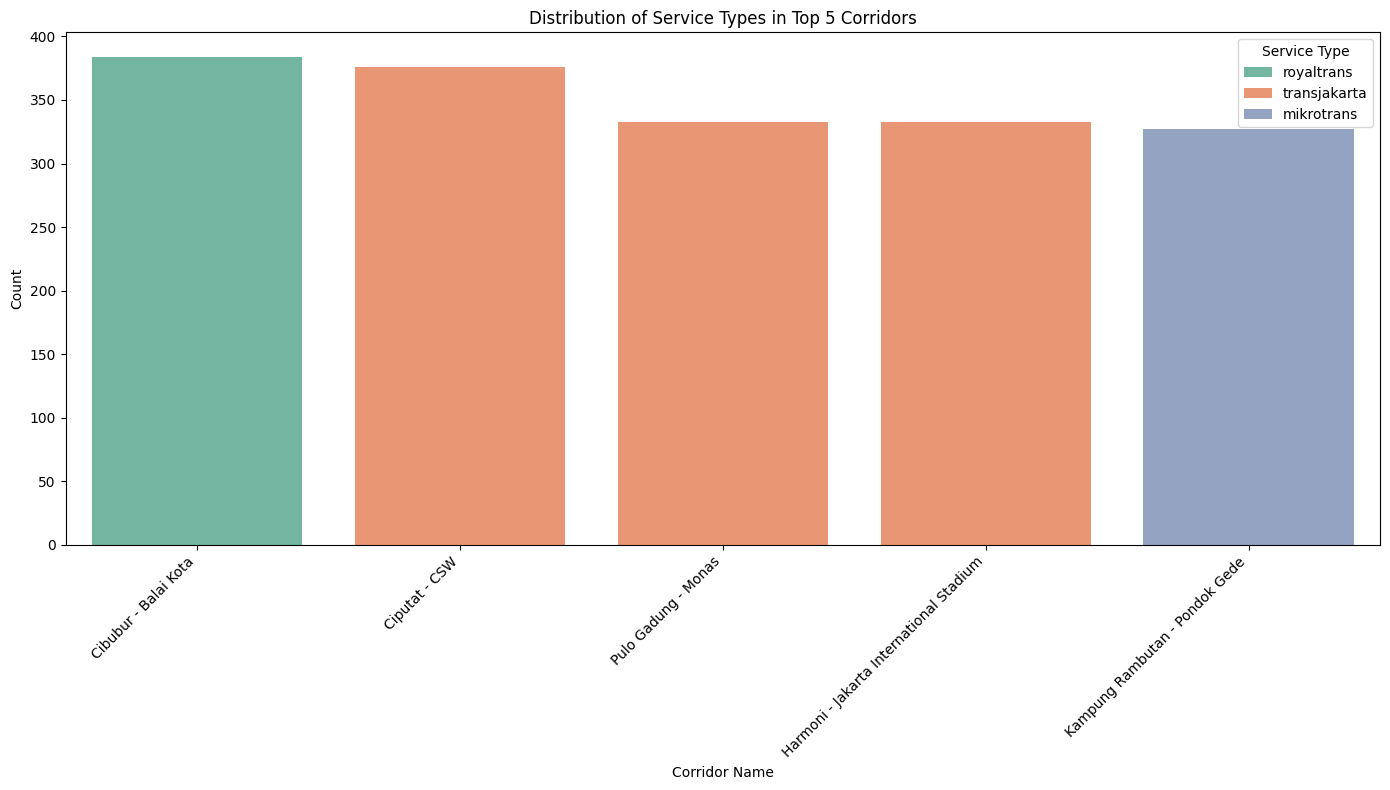

In [55]:
plt.figure(figsize=(14, 8))
sns.barplot(x='corridorName', y='count', hue='type', data=corridor_service_type, order=corridor_order, palette='Set2')
plt.title('Distribution of Service Types in Top 5 Corridors')
plt.xlabel('Corridor Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Service Type')
plt.tight_layout()  
plt.show()

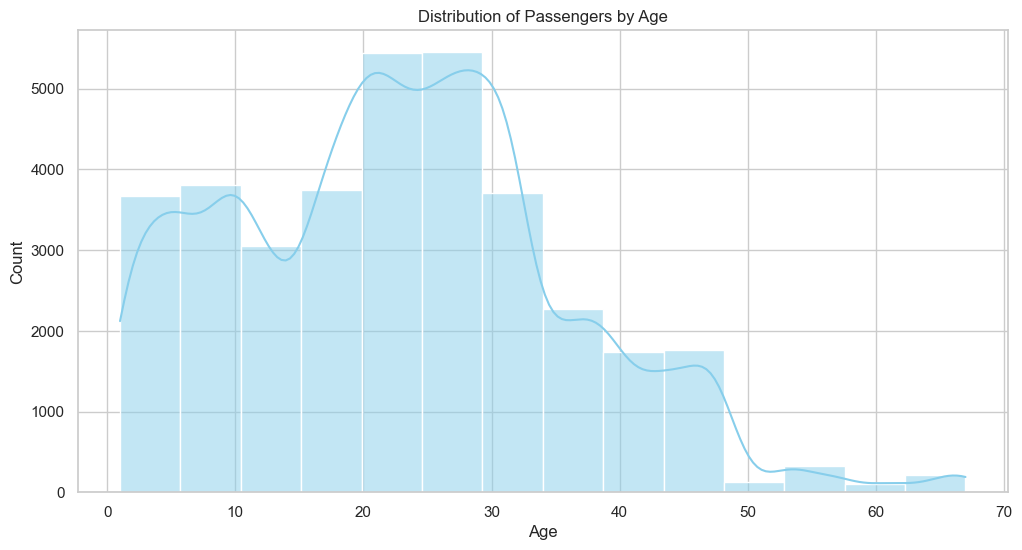

In [56]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Distribution of passengers by age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=14, kde=True, color='skyblue')
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

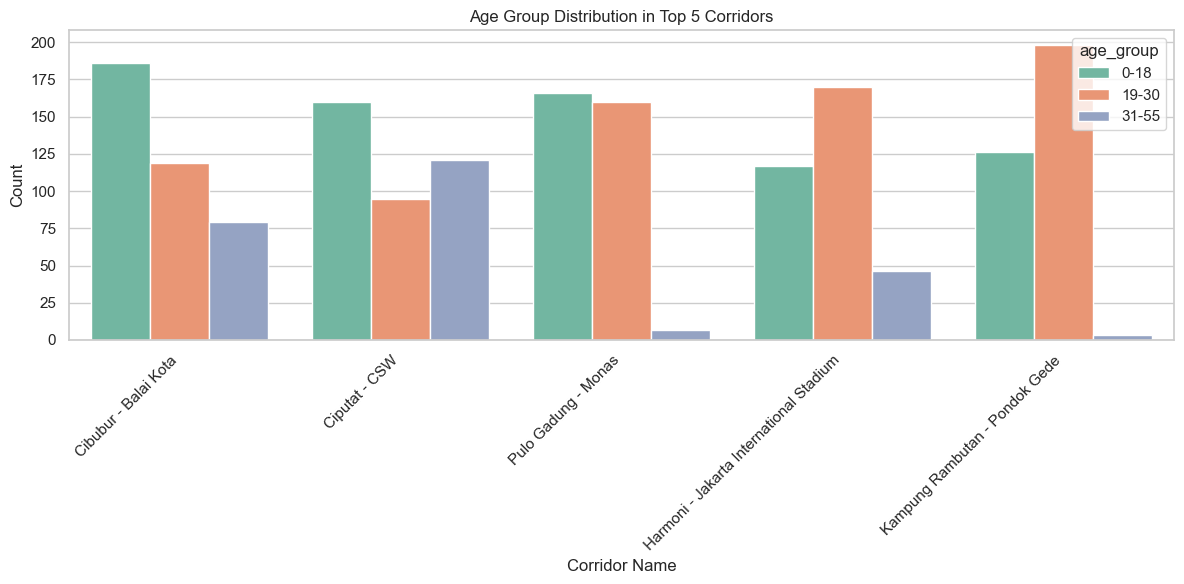

In [57]:
age_bins = [0, 19, 31, 56]
age_labels = ['0-18', '19-30', '31-55']
top_5_data['age_group'] = pd.cut(top_5_data['age'], bins=age_bins, labels=age_labels, right=False)

# Plot age group distribution for top 5 corridors
plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_data, x='corridorName', hue='age_group', hue_order=age_labels, palette='Set2', order=corridor_order)
plt.title('Age Group Distribution in Top 5 Corridors')
plt.xlabel('Corridor Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

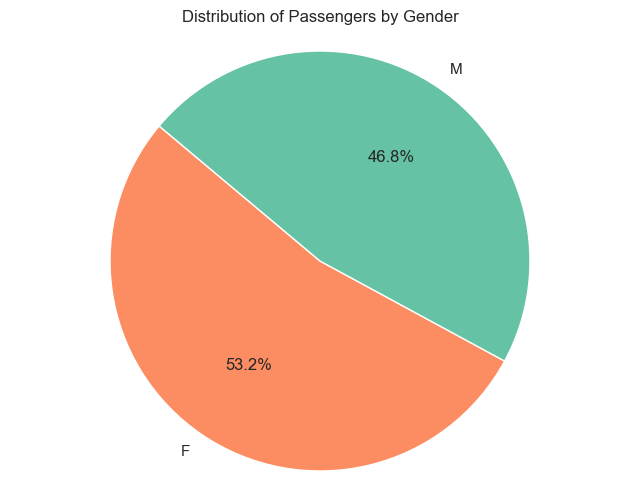

In [58]:
gender_counts = df['payCardSex'].value_counts()
colors = sns.color_palette('Set2', len(gender_counts))
colors.reverse()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

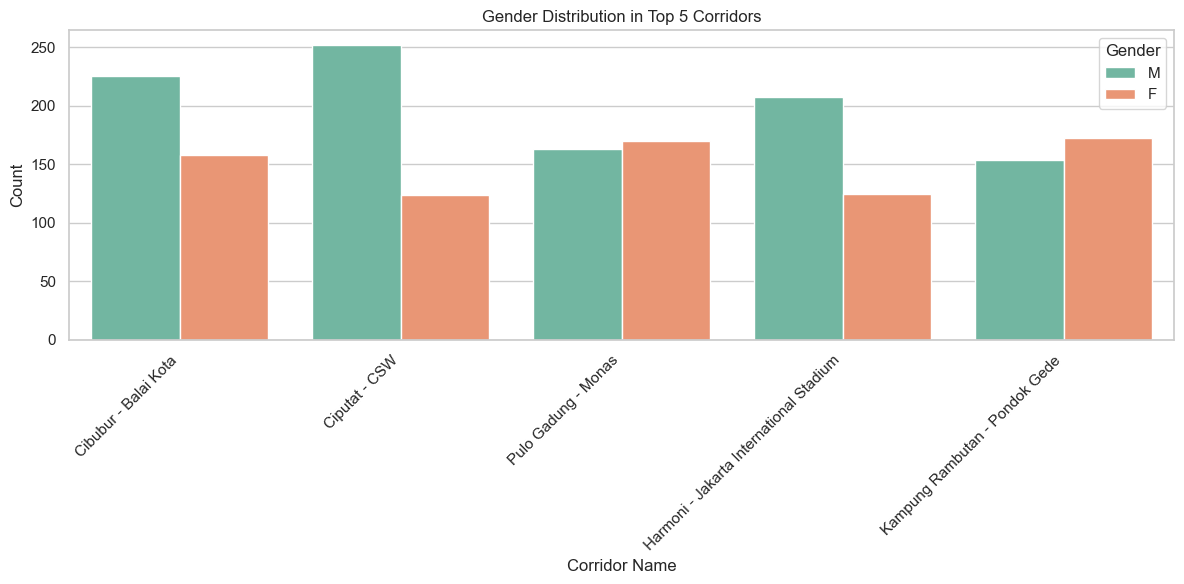

In [59]:
# Analyze gender distribution in top 5 corridors
plt.figure(figsize=(12, 6))
sns.countplot(x='corridorName', hue='payCardSex', hue_order=['M', 'F'], data=top_5_data, palette='Set2', order=corridor_order)
plt.title('Gender Distribution in Top 5 Corridors')
plt.xlabel('Corridor Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

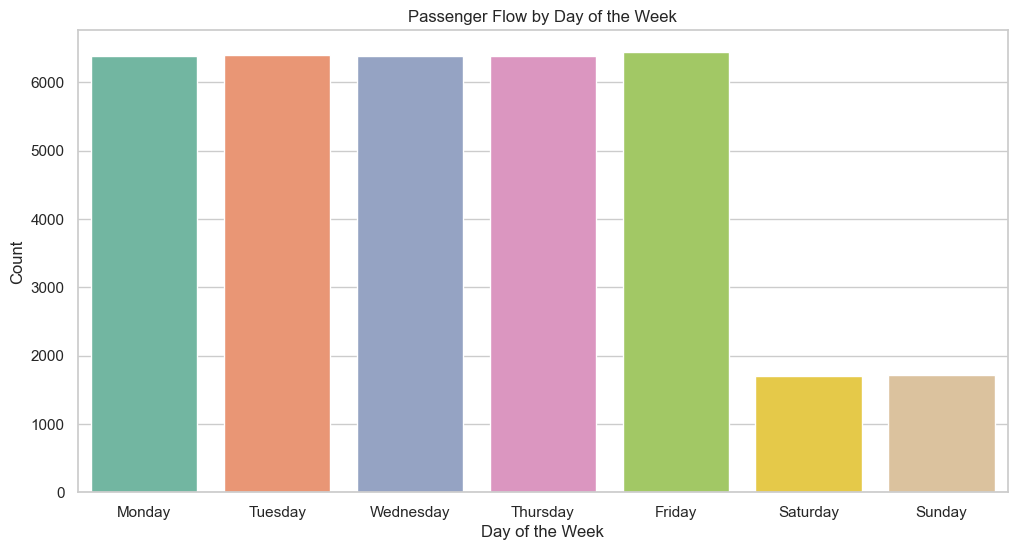

In [60]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Passenger flow during different days of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=df, order=day_order, palette='Set2')
plt.title('Passenger Flow by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

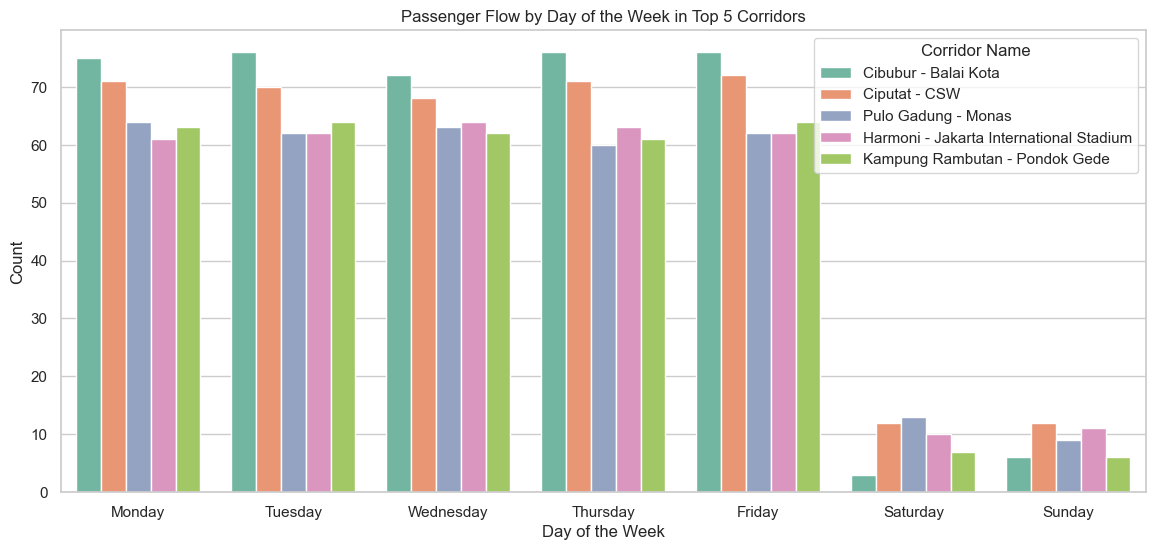

In [61]:
# Analyze passenger flow by day of the week for top 5 corridors
plt.figure(figsize=(14, 6))
sns.countplot(x='day', hue='corridorName', data=top_5_data, order=day_order, hue_order=corridor_order, palette='Set2')
plt.title('Passenger Flow by Day of the Week in Top 5 Corridors')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Corridor Name')
plt.show()

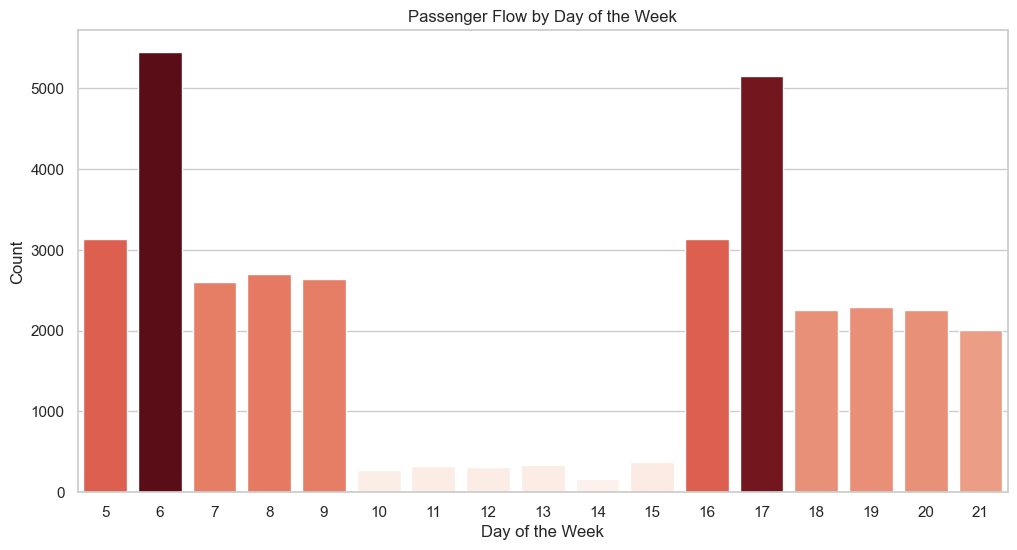

In [62]:
# Get the counts for the current corridor
counts = df['hour'].value_counts().sort_index()

# Calculate the darkness of red based on counts
max_count = counts.max()
red_colors = [sns.color_palette('Reds', n_colors=max_count+1)[count] for count in counts]

# Passenger flow during different days of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette=red_colors)
plt.title('Passenger Flow by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.show()

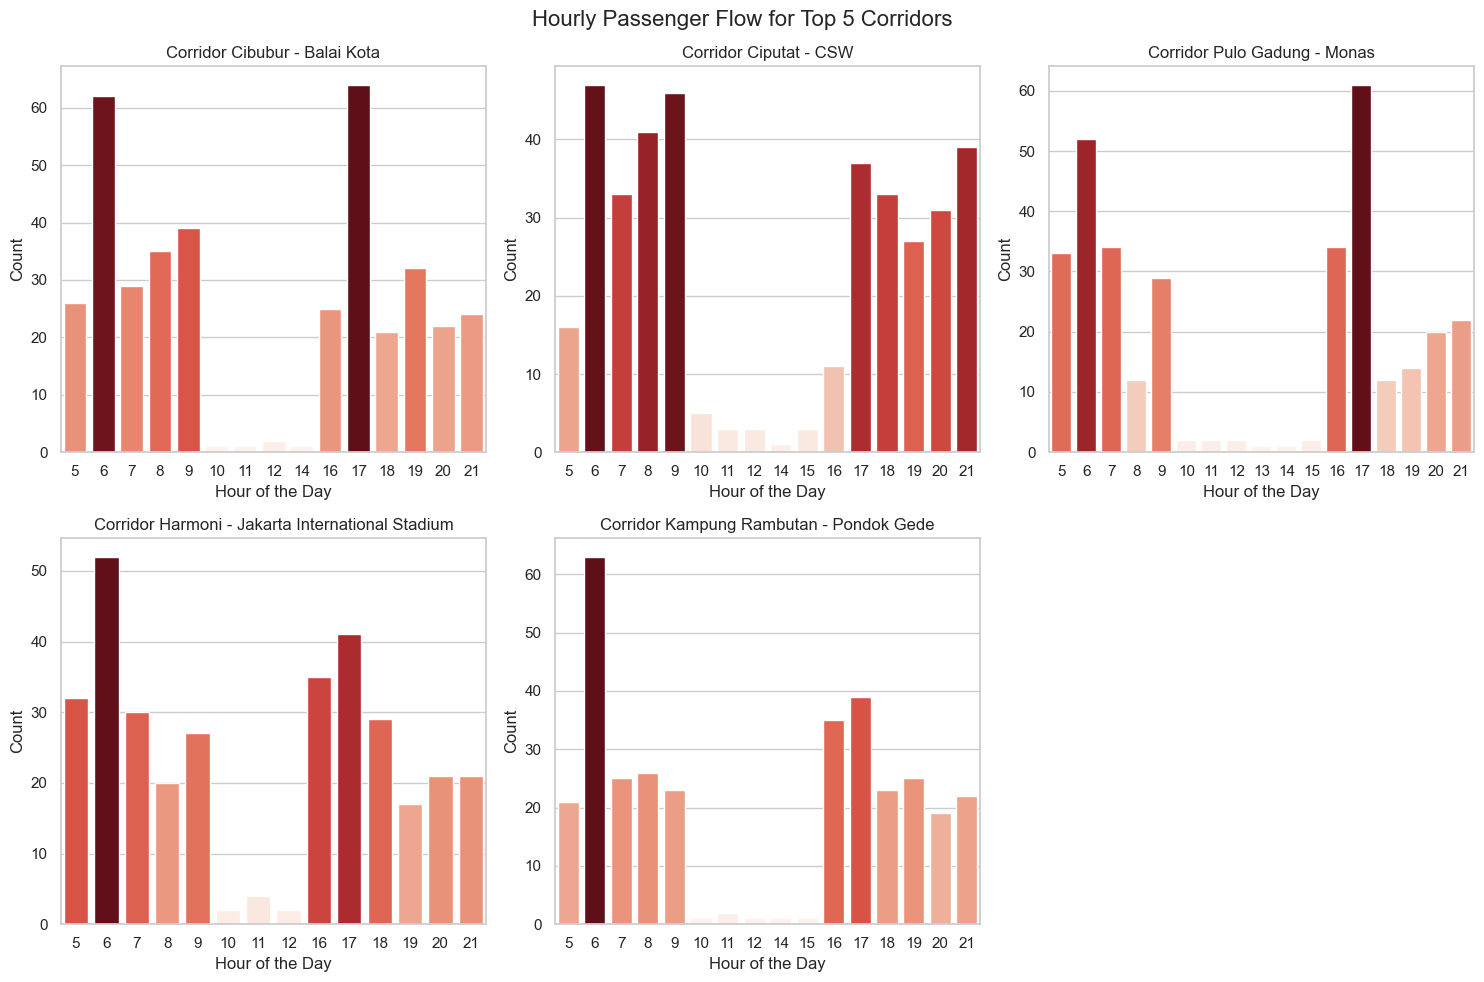

In [63]:
# Define the layout of subplots
num_rows = 2
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Hourly Passenger Flow for Top 5 Corridors', fontsize=16)

# Plot hourly passenger flow for each corridor
for i, corridor in enumerate(top_5_corridors):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Get the counts for the current corridor
    counts = df[df['corridorName'] == corridor]['hour'].value_counts().sort_index()
    
    # Calculate the darkness of red based on counts
    max_count = counts.max()
    red_colors = [sns.color_palette('Reds', n_colors=max_count+1)[count] for count in counts]
    
    # Plot using the customized color palette
    sns.countplot(x='hour', data=df[df['corridorName'] == corridor], palette=red_colors, ax=ax)
    ax.set_title(f'Corridor {corridor}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Count')

# Remove empty subplots if any
for i in range(len(top_5_corridors), num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()